In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
# import mpld3
# mpld3.enable_notebook()
import warnings
warnings.filterwarnings('ignore')

In [46]:
def aggregate_precision(data):
    count_agg = 1
    summ = 0.
    aggregates = []
    last_row = [-1, -1]
    for row in data:
        last_row = row
        summ += row[1]
        if row[0] + 1 == count_agg * 100:
            aggregates.append([count_agg * 100, summ / 100])
            summ = 0.
            count_agg += 1
    if summ > 0.:
        aggregates.append([count_agg * 100, summ / ((last_row[0] + 1) - ((count_agg - 1) * 100))])
        
    return aggregates

# TRAIN

### Random-v2

In [140]:
X_random_tr = []
y_random_tr = []
with open('data/rs/random-v2/eval_train_return.csv', mode='r') as f:
    for row in f:
        line = row.split(" ")
        y_random_tr.append(float(line[0]))
        X_random_tr.append(float(line[1]))
X_random_tr = np.array(X_random_tr)
y_random_tr = np.array(y_random_tr)
print X_random_tr.shape
print y_random_tr.shape
print "Mean average return: {}".format(np.mean(y_random_tr))

precision_random_tr = []
with open('data/rs/random-v2/precision_train.csv', mode='r') as f:
    for row in f:
        line = row.split(" ")
        row = [int(line[0]), float(line[2]), int(line[1])]
        precision_random_tr.append(row)
        
precision_random_tr = np.array(aggregate_precision(precision_random_tr))

(199,)
(199,)
Mean average return: 9.02929648241


### ExpCB

In [134]:
X_cb_tr = []
y_cb_tr = []
with open('data/rs/expCB/eval_train_return.csv', mode='r') as f:
    for row in f:
        line = row.split(" ")
        y_cb_tr.append(float(line[0]))
        X_cb_tr.append(float(line[1]))
X_cb_tr = np.array(X_cb_tr)
y_cb_tr = np.array(y_cb_tr)
print X_cb_tr.shape
print y_cb_tr.shape
print "Mean average return: {}".format(np.mean(y_cb_tr))

precision_cb_tr = []
with open('data/rs/expCB/precision_train.csv', mode='r') as f:
    for row in f:
        line = row.split(" ")
        row = [int(line[0]), float(line[2]), int(line[1])]
        precision_cb_tr.append(row)
        
precision_cb_tr = np.array(aggregate_precision(precision_cb_tr))

(224,)
(224,)
Mean average return: 29.819375


### ExpFM

In [141]:
X_fm_tr = []
y_fm_tr = []
with open('data/rs/expFM/eval_train_return.csv', mode='r') as f:
    for row in f:
        line = row.split(" ")
        y_fm_tr.append(float(line[0]))
        X_fm_tr.append(float(line[1]))
X_fm_tr = np.array(X_fm_tr)
y_fm_tr = np.array(y_fm_tr)
print X_fm_tr.shape
print y_fm_tr.shape
print "Mean average return: {}".format(np.mean(y_fm_tr))

precision_fm_tr = []
with open('data/rs/expFM/precision_train.csv', mode='r') as f:
    for row in f:
        line = row.split(" ")
        row = [int(line[0]), float(line[2]), int(line[1])]
        precision_fm_tr.append(row)
        
precision_fm_tr = np.array(aggregate_precision(precision_fm_tr))

(205,)
(205,)
Mean average return: 35.4380487805


### ExpCF

In [142]:
X_cf_tr = []
y_cf_tr = []
with open('data/rs/expCF/eval_train_return.csv', mode='r') as f:
    for row in f:
        line = row.split(" ")
        y_cf_tr.append(float(line[0]))
        X_cf_tr.append(float(line[1]))
X_cf_tr = np.array(X_cf_tr)
y_cf_tr = np.array(y_cf_tr)

print X_cf_tr.shape
print y_cf_tr.shape
print "Mean average return: {}".format(np.mean(y_cf_tr))

precision_cf_tr = []
with open('data/rs/expCF/precision_train.csv', mode='r') as f:
    for row in f:
        line = row.split(" ")
        row = [int(line[0]), float(line[2]), int(line[1])]
        precision_cf_tr.append(row)
        
precision_cf_tr = np.array(aggregate_precision(precision_cf_tr))

(104,)
(104,)
Mean average return: 21.3085576923


# Graph

In [96]:
# cb_color="#C68C00"
cb_color="#3E2900"
cb_random_color="red"
fm_color="#117E4F"
cf_color="#596FC8"

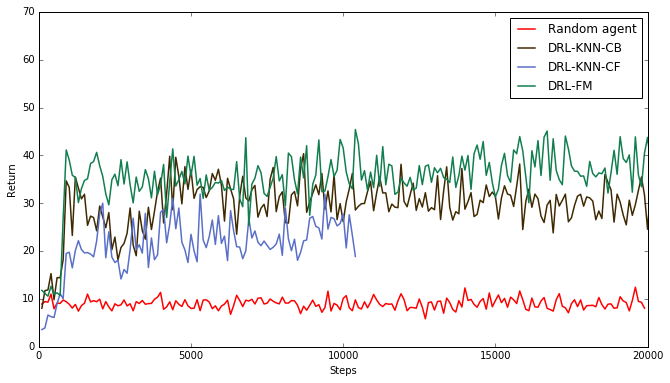

In [151]:
import matplotlib.patheffects as path_effects
fig = plt.figure(figsize=(24,6))
axes = fig.add_subplot(1, 2, 1)
plt.subplot(1,2,1)
axes.plot(X_random_tr, y_random_tr, label='Random agent', color=cb_random_color, linestyle='solid', linewidth=1.5)
axes.plot(X_cb_tr, y_cb_tr, label='DRL-KNN-CB', color=cb_color, linestyle='solid', linewidth=1.5)
axes.plot(X_cf_tr, y_cf_tr, label='DRL-KNN-CF', color=cf_color, linestyle='solid', linewidth=1.5)
axes.plot(X_fm_tr, y_fm_tr, label='DRL-FM', color=fm_color, linestyle='solid', linewidth=1.5)
# axes.plot(X_t, y_t, label='test CB', color="black", linestyle='--', linewidth=3.0)
# axes.plot(X_m, y_m, label='CF-knn 5%', color="red", linestyle='solid', linewidth=1.0)
axes.plot([a for a in np.arange(8000)], [70 for a in np.arange(8000)], color="black", linestyle='--', linewidth=0.5)

plt.xlabel('Steps')
plt.ylabel('Return')
plt.xlim([0, 20000])
plt.legend(loc=1)

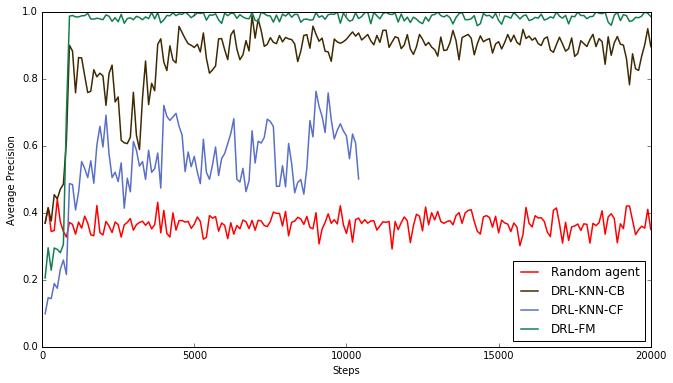

In [152]:
fig_p = plt.figure(figsize=(24,6))
axes_p = fig_p.add_subplot(1, 2, 1)
plt.subplot(1,2,1)
axes_p.plot(precision_random_tr[:, 0], precision_random_tr[:, 1], label='Random agent', color=cb_random_color, linestyle='solid', linewidth=1.5)
axes_p.plot(precision_cb_tr[:, 0], precision_cb_tr[:, 1], label='DRL-KNN-CB', color=cb_color, linestyle='solid', linewidth=1.5)
axes_p.plot(precision_cf_tr[:, 0], precision_cf_tr[:, 1], label='DRL-KNN-CF', color=cf_color, linestyle='solid', linewidth=1.5)
axes_p.plot(precision_fm_tr[:, 0], precision_fm_tr[:, 1], label='DRL-FM', color=fm_color, linestyle='solid', linewidth=1.5)

plt.xlabel('Steps')
plt.ylabel('Average Precision')
plt.xlim([0, 20000])
plt.legend(loc=4)

# TEST

### Random-v2

In [146]:
Xt_random_tr = []
yt_random_tr = []
with open('data/rs/random-v2/eval_test_return.csv', mode='r') as f:
    for row in f:
        line = row.split(" ")
        yt_random_tr.append(line[0])
        Xt_random_tr.append(line[1])
Xt_random_tr = np.array(Xt_random_tr)
yt_random_tr = np.array(yt_random_tr)
print Xt_random_tr.shape
print yt_random_tr.shape

precision_random_t = []
with open('data/rs/random-v2/precision_test.csv', mode='r') as f:
    for row in f:
        line = row.split(" ")
        row = [int(line[0]), float(line[2]), int(line[1])]
        precision_random_t.append(row)
        
precision_random_t = np.array(aggregate_precision(precision_random_t))

(199,)
(199,)


### ExpCB

In [137]:
X_cb_t = []
y_cb_t = []
with open('data/rs/expCB/eval_test_return.csv', mode='r') as f:
    for row in f:
        line = row.split(" ")
        y_cb_t.append(float(line[0]))
        X_cb_t.append(float(line[1]))
X_cb_t = np.array(X_cb_t)
y_cb_t = np.array(y_cb_t)
print X_cb_t.shape
print y_cb_t.shape
print "Mean average return: {}".format(np.mean(y_cb_t))

precision_cb_t = []
with open('data/rs/expCB/precision_test.csv', mode='r') as f:
    for row in f:
        line = row.split(" ")
        row = [int(line[0]), float(line[2]), int(line[1])]
        precision_cb_t.append(row)
        
precision_cb_t = np.array(aggregate_precision(precision_cb_t))
precision_cb_t.shape
precision_cb_t[223]

(224,)
(224,)
Mean average return: 34.1874553571


array([  2.24000000e+04,   9.92696970e-01])

### ExpFM

In [147]:
X_fm_t = []
y_fm_t = []
with open('data/rs/expFM/eval_test_return.csv', mode='r') as f:
    for row in f:
        line = row.split(" ")
        y_fm_t.append(float(line[0]))
        X_fm_t.append(float(line[1]))
X_fm_t = np.array(X_fm_t)
y_fm_t = np.array(y_fm_t)
print X_fm_t.shape
print y_fm_t.shape
print "Mean average return: {}".format(np.mean(y_fm_t))

precision_fm_t = []
with open('data/rs/expFM/precision_test.csv', mode='r') as f:
    for row in f:
        line = row.split(" ")
        row = [int(line[0]), float(line[2]), int(line[1])]
        precision_fm_t.append(row)
        
precision_fm_t = np.array(aggregate_precision(precision_fm_t))

(205,)
(205,)
Mean average return: 35.086195122


### ExpCF

In [148]:
X_cf_t = []
y_cf_t = []
with open('data/rs/expCF/eval_test_return.csv', mode='r') as f:
    for row in f:
        line = row.split(" ")
        y_cf_t.append(float(line[0]))
        X_cf_t.append(float(line[1]))
X_cf_t = np.array(X_cf_t)
y_cf_t = np.array(y_cf_t)
print X_cf_t.shape
print y_cf_t.shape
print "Mean average return: {}".format(np.mean(y_cf_t))

precision_cf_t = []
with open('data/rs/expCF/precision_test.csv', mode='r') as f:
    for row in f:
        line = row.split(" ")
        row = [int(line[0]), float(line[2]), int(line[1])]
        precision_cf_t.append(row)
        
precision_cf_t = np.array(aggregate_precision(precision_cf_t))
precision_cf_t.shape

(104,)
(104,)
Mean average return: 23.0451923077


(104, 2)

# Graph

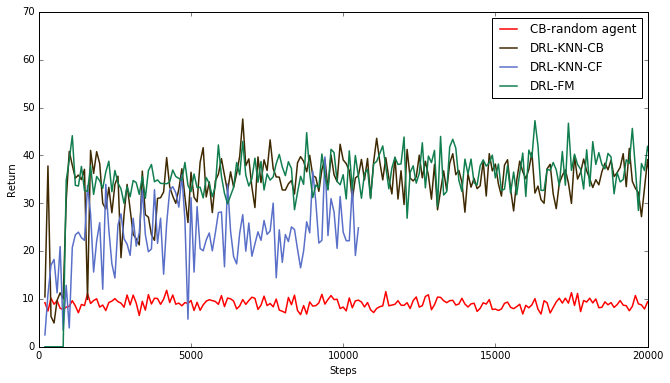

In [153]:
figt = plt.figure(figsize=(24,6))
axest = figt.add_subplot(1, 2, 1)
plt.subplot(1,2,1)
axest.plot(Xt_random_tr, yt_random_tr, label='CB-random agent', color=cb_random_color, linestyle='solid', linewidth=1.5)
axest.plot(X_cb_t, y_cb_t, label='DRL-KNN-CB', color=cb_color, linestyle='solid', linewidth=1.5)
axest.plot(X_cf_t, y_cf_t, label='DRL-KNN-CF', color=cf_color, linestyle='solid', linewidth=1.5)
axest.plot(X_fm_t, y_fm_t, label='DRL-FM', color=fm_color, linestyle='solid', linewidth=1.5)
# axes.plot(X_t, y_t, label='test CB', color="black", linestyle='--', linewidth=3.0)
# axes.plot(X_m, y_m, label='CF-knn 5%', color="red", linestyle='solid', linewidth=1.0)
axest.plot([a for a in np.arange(8000)], [70 for a in np.arange(8000)], color="black", linestyle='--', linewidth=0.5)

plt.xlabel('Steps')
plt.ylabel('Return')
plt.xlim([0, 20000])
plt.legend(loc=1)

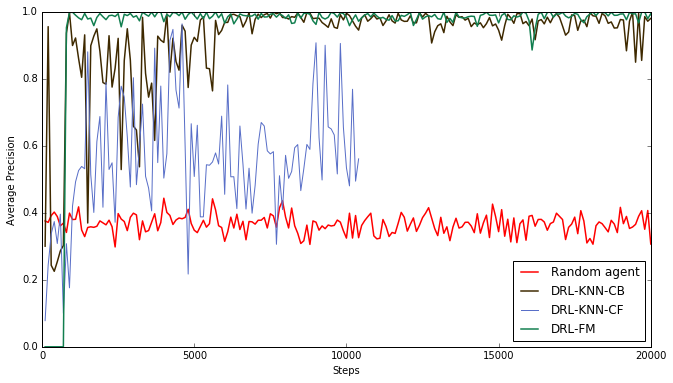

In [154]:
fig_pt = plt.figure(figsize=(24,6))
axes_pt = fig_pt.add_subplot(1, 2, 1)
plt.subplot(1,2,1)
axes_pt.plot(precision_random_t[:, 0], precision_random_t[:, 1], label='Random agent', color=cb_random_color, linestyle='solid', linewidth=1.5)
axes_pt.plot(precision_cb_t[:, 0], precision_cb_t[:, 1], label='DRL-KNN-CB', color=cb_color, linestyle='solid', linewidth=1.5)
axes_pt.plot(precision_cf_t[:, 0], precision_cf_t[:, 1], label='DRL-KNN-CF', color=cf_color, linestyle='solid', linewidth=1.)
axes_pt.plot(precision_fm_t[:, 0], precision_fm_t[:, 1], label='DRL-FM', color=fm_color, linestyle='solid', linewidth=1.5)

plt.xlabel('Steps')
plt.ylabel('Average Precision')
plt.xlim([0, 20000])
plt.legend(loc=4)